In [1]:
import torch
import matplotlib.pyplot as plt

from torch import Tensor
from functional import terelu

In [2]:
x = torch.arange(-2.5, 3.5, 0.01)
alpha = 1.0
beta = torch.tensor(1.0)
mu = 1.0

y = terelu(x, alpha=alpha, beta=beta, mu=mu)

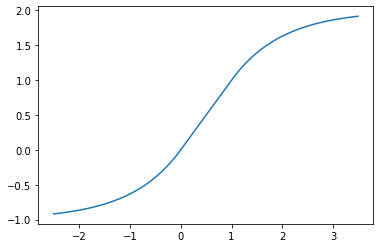

In [3]:
plt.plot(x.numpy(), y.numpy())

In [4]:
def terelu(x, beta: Tensor, mu: Tensor, alpha: Tensor):
    c1 = (x <= 0).float()
    c2 = ((mu > x) * (x > 0)).float()
    c3 = (x >= mu).float()

    o1 = c1 * (alpha * (torch.exp(x) - 1))
    o2 = c2 * x
    o3 = c3 * (beta.bmm(mu - (torch.exp(mu - x) - 1)))


    return o1 + o2 + o3



x = torch.ones((2, 3, 2, 2)) * 5

beta = torch.tensor(1)
y = terelu(x, alpha=alpha, beta=beta, mu=mu)
print(y)
print('#############################################')

beta = torch.Tensor([1, 1, 1])
y = terelu(x, alpha=alpha, beta=beta, mu=mu)
print(y)


RuntimeError: Expected 3-dimensional tensor, but got 0-dimensional tensor for argument #1 'batch1' (while checking arguments for bmm)